In [1]:
import scipy as sp
import scipy.linalg as la
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline
sp.set_printoptions(precision=3, linewidth=250, suppress=True)

# Resposta no dominio da frequência

Consideremos as equações:
\begin{equation}
{\bf M \ddot{q}} + (\Omega{\bf G} + {\bf C}){\bf \dot{q}} + {\bf Kq} = {\bf Q}
\end{equation}
Onde ${\bf q}^T = [u \ v \ \theta \ \psi]$

\begin{equation}
M = 
\begin{bmatrix} 
        m & 0 & 0 & 0 \\
        0 & m & 0 & 0 \\
        0 & 0 & I_d & 0 \\
        0 & 0 & 0 & I_d 
\end{bmatrix} \\
G = 
\begin{bmatrix} 
        0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 \\
        0 & 0 & 0 & I_p \\
        0 & 0 & -I_p & 0 
\end{bmatrix} \\
K = 
\begin{bmatrix} 
        k_{xT} & 0 & 0 & k_{xC} \\
        0 & k_{yT} & -k_{yC} & 0 \\
        0 & -k_{yC} & k_{yR} & 0 \\
        k_{xC} & 0 & 0 & k_{xR} 
\end{bmatrix} \\
C = 
\begin{bmatrix} 
        c_{xT} & 0 & 0 & c_{xC} \\
        0 & c_{yT} & -c_{yC} & 0 \\
        0 & -c_{yC} & c_{yR} & 0 \\
        c_{xC} & 0 & 0 & c_{xR} 
\end{bmatrix}
\end{equation}   

Iremos agora construir a matriz A considerando as propriedades abaixo:

In [2]:
m = 122.68
Id = 2.8625
Ip = 0.6134

In [3]:
a = 0.25
b = 0.25

In [4]:
kx1 = 1e6
ky1 = 1.5e6
kx2 = 1.3e6
ky2 = 1.8e6

In [5]:
cx1 = 20
cy1 = 30
cx2 = 26
cy2 = 36

In [6]:
kxt = kx1 + kx2
kyt = ky1 + ky2
kxc = -a*kx1 + b*kx2
kyc = -a*ky1 + b*ky2
kxr = a**2*kx1 + b**2*kx2
kyr = a**2*ky1 + b**2*ky2

In [7]:
cxt = cx1 + cx2
cyt = cy1 + cy2
cxc = -a*cx1 + b*cx2
cyc = -a*cy1 + b*cy2
cxr = a**2*cx1 + b**2*cx2
cyr = a**2*cy1 + b**2*cy2

In [8]:
M = sp.diag([m, m, Id, Id])
G = sp.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, Ip],
              [0, 0, -Ip, 0]])
C = sp.array([[cxt, 0, 0, cxc],
              [0, cyt, -cyc, 0],
              [0, -cyc, cyr, 0],
              [cxc, 0, 0, cxr]])
K = sp.array([[kxt, 0, 0, kxc],
              [0, kyt, -kyc, 0],
              [0, -kyc, kyr, 0],
              [kxc, 0, 0, kxr]])

In [29]:
K

array([[ 2300000.,        0.,        0.,    75000.],
       [       0.,  3300000.,   -75000.,        0.],
       [       0.,   -75000.,   206250.,        0.],
       [   75000.,        0.,        0.,   143750.]])

In [9]:
I = sp.eye(len(M))
Z = sp.zeros_like(M)
Minv = la.inv(M)

Montar a matriz A utilizando hstack e vstack:

In [10]:
w = 418.88

In [11]:
A = sp.vstack([sp.hstack([Z, I]),
               sp.hstack([-Minv @ K, -Minv @ (G*w + C)])])
print(A)

[[     0.         0.         0.         0.         1.         0.         0.         0.   ]
 [     0.         0.         0.         0.         0.         1.         0.         0.   ]
 [     0.         0.         0.         0.         0.         0.         1.         0.   ]
 [     0.         0.         0.         0.         0.         0.         0.         1.   ]
 [-18747.962      0.         0.      -611.347     -0.375      0.         0.        -0.012]
 [     0.    -26899.25     611.347      0.         0.        -0.538      0.012      0.   ]
 [     0.     26200.873 -72052.402      0.         0.         0.524     -1.441    -89.761]
 [-26200.873      0.         0.    -50218.341     -0.524      0.        89.761     -1.004]]


Podemos calcular os autovalores e autovetores com a função scipy.linalg.eig()

In [12]:
evalues, evects = la.eig(A)
evalues = sp.sort(evalues.imag)
wn = (sp.absolute(evalues))

In [13]:
wn

array([ 300.84 ,  201.99 ,  162.696,  134.905,  134.905,  162.696,  201.99 ,  300.84 ])

Iremos agora calcular as frequências naturais para um range de velocidades.

In [14]:
omega = sp.linspace(0, 200, 50)

In [15]:
fw = []
bw = []
fw2 = []
bw2 = []
for w in omega:
    A = sp.vstack([sp.hstack([        Z,                 I]),
                   sp.hstack([-Minv @ K, -Minv @ (G*w + C)])])
    evalues, evects = la.eig(A)
    evalues = sp.sort(evalues.imag)
    wn = (sp.absolute(evalues))
    bw.append(wn[4])
    fw.append(wn[5])
    bw2.append(wn[6])
    fw2.append(wn[7])

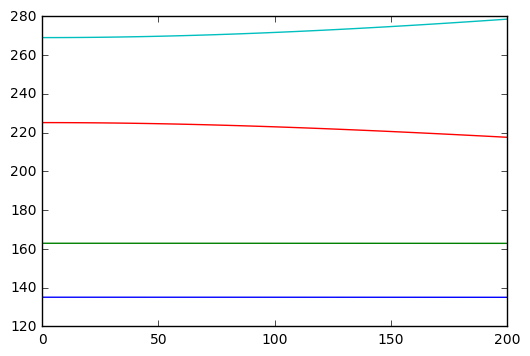

In [16]:
plt.plot(omega, bw)
plt.plot(omega, fw)
plt.plot(omega, bw2)
plt.plot(omega, fw2)
#plt.plot(Omega, Omega)

Considerando o ${\bf Q}$ em forma complexa temos:
\begin{equation}
Q = 
\left[ \matrix{
m \epsilon \Omega^2cos{(\Omega t + \delta}) \\
m \epsilon \Omega^2sin{(\Omega t + \delta}) \\
-(I_d - I_p)\beta \ \Omega^2sin{(\Omega t + \gamma}) \\
(I_d - I_p)\beta \ \Omega^2cos{(\Omega t + \gamma})
} \right] \\ 
= \Re
\left[ \matrix{
m \epsilon e^{j\delta} \\
-{\it j}m \epsilon e^{j\delta} \\
{\it j}(I_d - I_p)\beta e^{j\gamma} \\
(I_d - I_p)\beta e^{j\gamma}
} \right] \ \Omega^2 e^{j \Omega t} \\
\end{equation}


Assumindo uma resposta da forma ${\bf q}(t) = \Re({\bf q}_0 e^{j \Omega t})$ :

\begin{equation}
[-\Omega^2{\bf M} + {\it j}\Omega (\Omega{\bf G} + {\bf C}) + {\bf K}]{\bf q}_0 e^{j \Omega t} = \Omega^2 {\bf b}_0 e^{j \Omega t}
\end{equation}

\begin{equation}
{\bf b}_0 = 
\left[ \matrix{
m \epsilon e^{j\delta} \\
-{\it j}m \epsilon e^{j\delta} \\
{\it j}(I_d - I_p)\beta e^{j\gamma} \\
(I_d - I_p)\beta e^{j\gamma}
} \right] \\
\end{equation}

In [17]:
me = 0.01
delta = 0
beta = 0
gamma = 0

In [18]:
b0 = sp.array([me*sp.exp(1j*delta)               ,
               -1j*me*sp.exp(1j*delta)           ,
               1j*(Id - Ip)*beta*sp.exp(1j*gamma),
               (Id - Ip)*beta*sp.exp(1j*gamma)   ])

\begin{equation}
{\bf q}_0 = [-\Omega^2{\bf M} + {\it j}\Omega (\Omega{\bf G} + {\bf C}) + {\bf K}]^{-1} \Omega^2 {\bf b}_0
\end{equation}

In [19]:
def q0(w):
    q0 = (la.inv(-w**2*M + 1j*w*(w*G + C) + K))*w**2 @ b0
    return q0

In [20]:
omega = sp.linspace(0, 400, 700)

In [21]:
q0resp = q0(omega[0])
for w in omega[1:]:
    q0resp = sp.vstack([q0resp, q0(w)])

In [26]:
q0resp.shape

(700, 4)

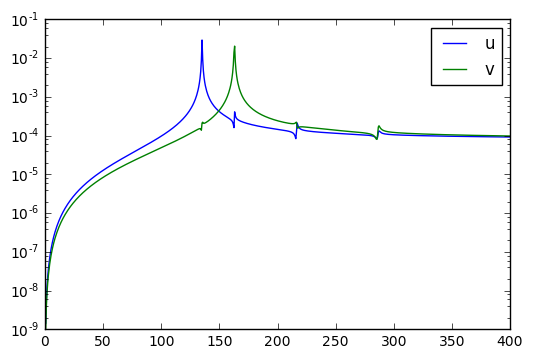

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(omega, sp.absolute(q0resp[:, 0]))
ax.plot(omega, sp.absolute(q0resp[:, 1]))
ax.semilogy()
ax.legend(['u', 'v'])

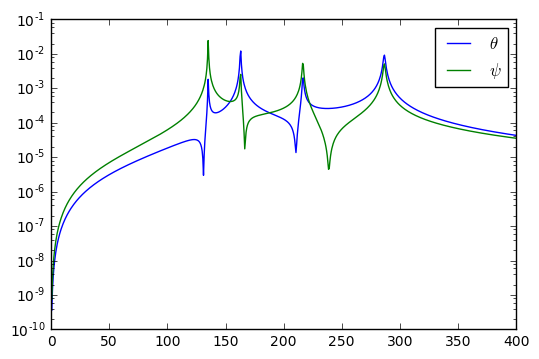

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(omega, sp.absolute(q0resp[:, 2]))
ax.plot(omega, sp.absolute(q0resp[:, 3]))
ax.semilogy()
ax.legend([r"$\theta$", r'$\psi$'])